PE30 SUPRATIK CHAUDHURI
E2

14 - Perform the following Data Preprocessing tasks on country_vaccinations.csv dataset :
1.    Derive correlation matrix 
2.    Handling Data Duplication
3.   Data Normalisation  
4.   Data Transformation
5.    Draw Histogram

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [109]:
dataset = pd.read_csv("country_vaccinations.csv")

In [110]:
dataset.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
2,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2021-01-01,NaN,NaN,NaN,NaN,11070.0,NaN,NaN,NaN,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2021-01-02,NaN,NaN,NaN,NaN,8776.0,NaN,NaN,NaN,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


In [111]:
dataset.isnull().any()

country                                False
iso_code                                True
date                                   False
total_vaccinations                      True
people_vaccinated                       True
people_fully_vaccinated                 True
daily_vaccinations_raw                  True
daily_vaccinations                      True
total_vaccinations_per_hundred          True
people_vaccinated_per_hundred           True
people_fully_vaccinated_per_hundred     True
daily_vaccinations_per_million          True
vaccines                               False
source_name                            False
source_website                         False
dtype: bool

In [112]:
dataset.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [122]:
df = dataset.fillna(0)

In [123]:
df.isnull().any()

country                                False
iso_code                               False
date                                   False
total_vaccinations                     False
people_vaccinated                      False
people_fully_vaccinated                False
daily_vaccinations_raw                 False
daily_vaccinations                     False
total_vaccinations_per_hundred         False
people_vaccinated_per_hundred          False
people_fully_vaccinated_per_hundred    False
daily_vaccinations_per_million         False
vaccines                               False
source_name                            False
source_website                         False
dtype: bool

# Handling data duplications

In [124]:
df.shape

(1267, 15)

In [125]:
df.drop_duplicates(keep=False,inplace=True)

In [126]:
df.shape

(1267, 15)

In [127]:
df.duplicated(keep=False).value_counts()

False    1267
dtype: int64

In [128]:
# cols = list(df.columns) 
# frame = pd.DataFrame(["Argentina", "ARG", "date", 700.0], columns = cols)

In [129]:
# df2 = df.head(5)
# df2
# df.append(df2)
# df.shape

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

# Data Correlation Graph

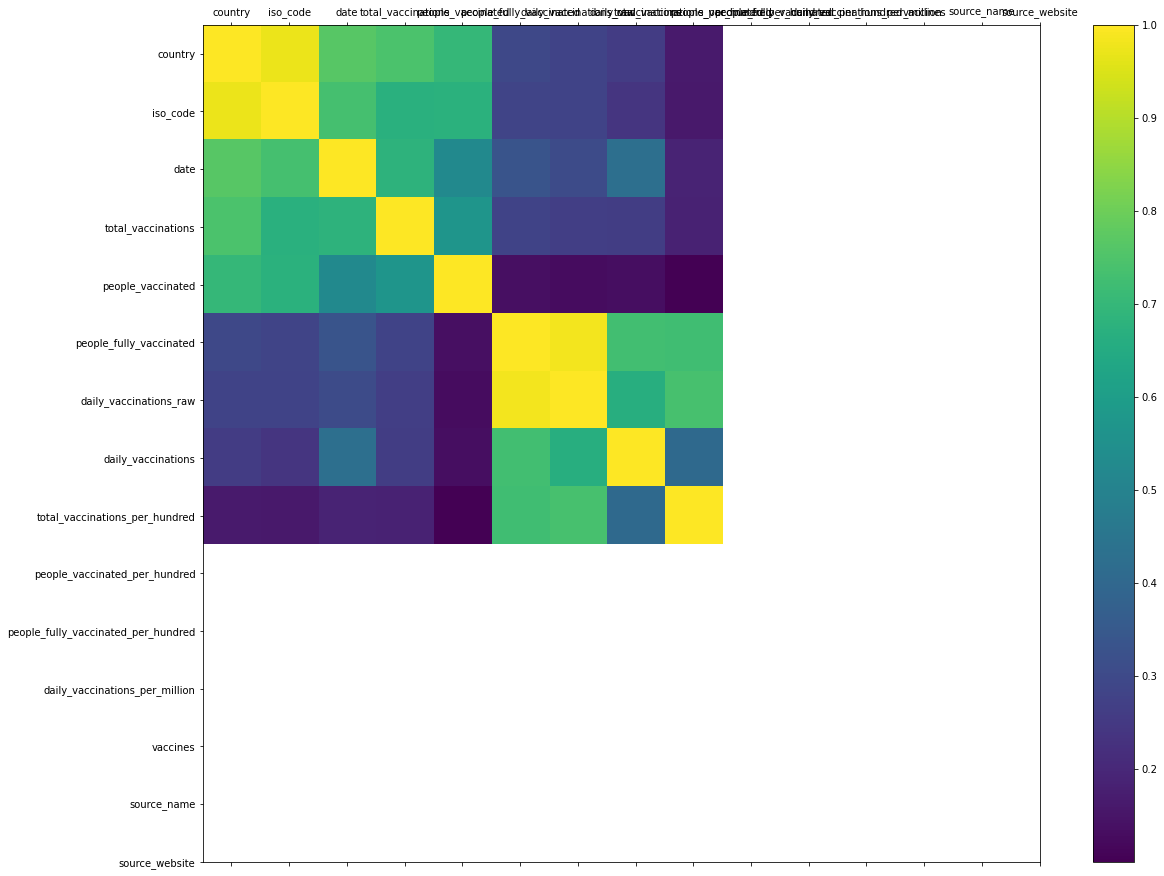

In [22]:
plt.figure(figsize=(19,15))
plt.matshow(df.corr(), fignum=1)
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

# Data Correlation Tabular

In [23]:
df.corr(method="pearson")

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
total_vaccinations,1.000000,0.973872,0.765583,0.744295,0.699634,0.295529,0.281319,0.258573,0.166405
people_vaccinated,0.973872,1.000000,0.735420,0.671842,0.675173,0.283493,0.281726,0.239985,0.160607
people_fully_vaccinated,0.765583,0.735420,1.000000,0.681887,0.528648,0.332249,0.306401,0.429495,0.189208
daily_vaccinations_raw,0.744295,0.671842,0.681887,1.000000,0.569033,0.282632,0.265718,0.262335,0.185082
daily_vaccinations,0.699634,0.675173,0.528648,0.569033,1.000000,0.136848,0.128719,0.135262,0.100162
total_vaccinations_per_hundred,0.295529,0.283493,0.332249,0.282632,0.136848,1.000000,0.985517,0.728976,0.724175
people_vaccinated_per_hundred,0.281319,0.281726,0.306401,0.265718,0.128719,0.985517,1.000000,0.662690,0.738839
people_fully_vaccinated_per_hundred,0.258573,0.239985,0.429495,0.262335,0.135262,0.728976,0.662690,1.000000,0.408369
daily_vaccinations_per_million,0.166405,0.160607,0.189208,0.185082,0.100162,0.724175,0.738839,0.408369,1.000000


# Transformation

In [58]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Argentina,ARG,2020-12-29,700.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Argentina,ARG,2020-12-30,0.0,0.0,0.0,0.0,15656.0,0.00,0.0,0.0,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
2,Argentina,ARG,2020-12-31,32013.0,0.0,0.0,0.0,15656.0,0.07,0.0,0.0,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2021-01-01,0.0,0.0,0.0,0.0,11070.0,0.00,0.0,0.0,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2021-01-02,0.0,0.0,0.0,0.0,8776.0,0.00,0.0,0.0,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


In [59]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [60]:
l1 = LabelEncoder()
label1 = l1.fit_transform(df["vaccines"])


data = df.drop(["date", "source_website", "vaccines"], axis="columns")
data["vaccines"] = label1
data["vaccines"].value_counts()

4    675
2    238
3    181
8     54
5     46
0     37
7     17
6     12
1      7
Name: vaccines, dtype: int64

In [61]:
data.head()

,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,source_name,vaccines
0,Argentina,ARG,700.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,Ministry of Health,8
1,Argentina,ARG,0.0,0.0,0.0,0.0,15656.0,0.00,0.0,0.0,346.0,Ministry of Health,8
2,Argentina,ARG,32013.0,0.0,0.0,0.0,15656.0,0.07,0.0,0.0,346.0,Ministry of Health,8
3,Argentina,ARG,0.0,0.0,0.0,0.0,11070.0,0.00,0.0,0.0,245.0,Ministry of Health,8
4,Argentina,ARG,0.0,0.0,0.0,0.0,8776.0,0.00,0.0,0.0,194.0,Ministry of Health,8


In [62]:
data.tail()

,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,source_name,vaccines
1262,Wales,0,0.0,0.0,0.0,0.0,8931.0,0.00,0.00,0.00,2833.0,Government of the United Kingdom,3
1263,Wales,0,151938.0,151737.0,201.0,0.0,9403.0,4.82,4.81,0.01,2982.0,Government of the United Kingdom,3
1264,Wales,0,162197.0,161932.0,265.0,10259.0,10123.0,5.14,5.14,0.01,3211.0,Government of the United Kingdom,3
1265,Wales,0,176186.0,175816.0,370.0,13989.0,10672.0,5.59,5.58,0.01,3385.0,Government of the United Kingdom,3
1266,Wales,0,190831.0,190435.0,396.0,14645.0,11105.0,6.05,6.04,0.01,3522.0,Government of the United Kingdom,3


In [48]:
X_Data = data[['people_fully_vaccinated', 'total_vaccinations', 'daily_vaccinations', 'daily_vaccinations_per_million']]
Y_Data = data["vaccines"]

In [49]:
print(X_Data.head(2))
print("\n\n\n")
print(Y_Data.head(2))

   people_fully_vaccinated  total_vaccinations  daily_vaccinations  \
0                      0.0               700.0                 0.0   
1                      0.0                 0.0             15656.0   

   daily_vaccinations_per_million  
0                             0.0  
1                           346.0  




0    8
1    8
Name: vaccines, dtype: int32


# Normalisation

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scalar = MinMaxScaler()
scalar.fit(X_Data)
New_Data = scalar.transform(X_Data)
New_Data[0:10]

array([[0.00000000e+00, 3.98942824e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.71307522e-02, 1.12086559e-02],
       [0.00000000e+00, 1.82447952e-03, 1.71307522e-02, 1.12086559e-02],
       [0.00000000e+00, 0.00000000e+00, 1.21127636e-02, 7.93676504e-03],
       [0.00000000e+00, 0.00000000e+00, 9.60267509e-03, 6.28462211e-03],
       [0.00000000e+00, 0.00000000e+00, 8.09705967e-03, 5.31277333e-03],
       [0.00000000e+00, 2.25681956e-03, 7.09368079e-03, 4.63247919e-03],
       [0.00000000e+00, 0.00000000e+00, 8.73607087e-03, 5.73390780e-03],
       [0.00000000e+00, 0.00000000e+00, 8.94287415e-03, 5.86348764e-03],
       [0.00000000e+00, 0.00000000e+00, 9.15077163e-03, 5.99306748e-03]])

# Histogram

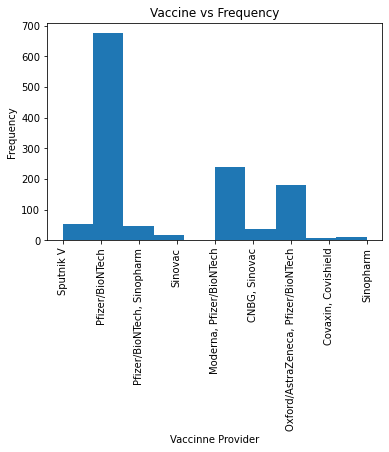

In [66]:
all_vaccines = dataset['vaccines'].array
plt.hist(all_vaccines)
plt.title('Vaccine vs Frequency')
plt.xlabel("Vaccinne Provider")
plt.ylabel("Frequency")
plt.xticks(rotation='vertical')
plt.show() 

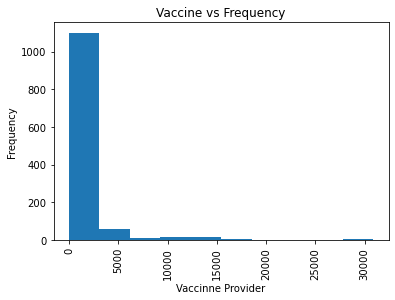

In [104]:
daily_vaccinations = dataset['daily_vaccinations_per_million'].array
dates = dataset["date"].array
plt.hist(x =daily_vaccinations)
plt.title('Vaccine vs Frequency')
plt.xlabel("Vaccinne Provider")
plt.ylabel("Frequency")
plt.xticks(rotation='vertical')
plt.show() 

<AxesSubplot:xlabel='date'>

<Figure size 2880x2160 with 0 Axes>

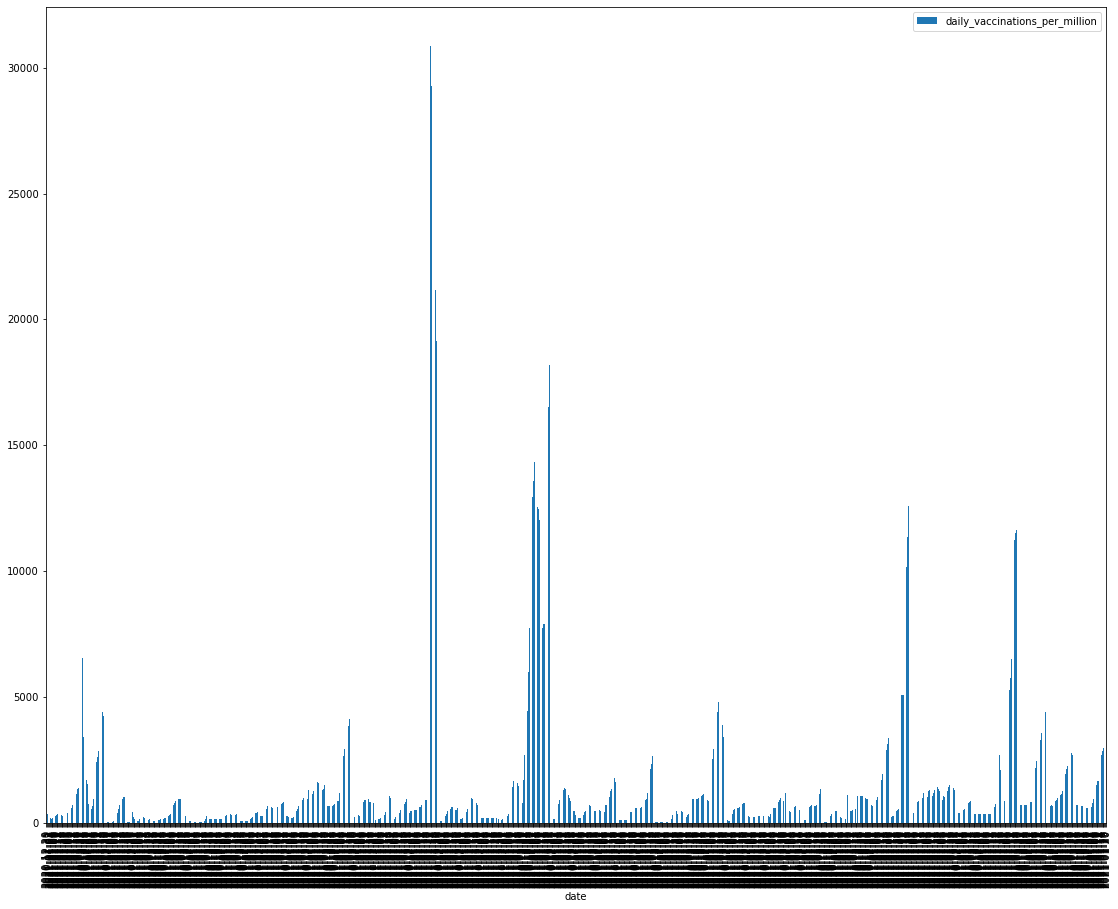

In [119]:
plt.figure(figsize=(40,30))
dataset.plot(x = "date", y = "daily_vaccinations_per_million", figsize = (19,15), kind="bar")